In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d kunalgupta2616/dog-vs-cat-images-data

Dataset URL: https://www.kaggle.com/datasets/kunalgupta2616/dog-vs-cat-images-data
License(s): GPL-2.0
100% 990M/991M [00:59<00:00, 19.5MB/s]
100% 991M/991M [00:59<00:00, 17.4MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dog-vs-cat-images-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.applications.vgg16 import VGG16

In [13]:
convo_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [16]:
convo_base.trainable = True
set_trainable = False
for layer in convo_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [17]:
for layers in convo_base.layers:
  print(layers.name, layers.trainable)

input_layer_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [19]:
convo_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [22]:
model = Sequential()

model.add(convo_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [26]:
train_ds = tensorflow.keras.utils.image_dataset_from_directory(
    directory = '/content/dogcat/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150, 150)
)

valid_ds = tensorflow.keras.utils.image_dataset_from_directory(
    directory = '/content/dogcat/validation',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150, 150)
)

Found 25000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


In [27]:
def process(image, label):
  image = tensorflow.cast(image/255. , tensorflow.float32)
  return image, label

train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)

In [28]:
model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate = 2e-5),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [29]:
history = model.fit(train_ds, validation_data = valid_ds, epochs = 10)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 106ms/step - accuracy: 0.8699 - loss: 0.2827 - val_accuracy: 0.9641 - val_loss: 0.1012
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.9520 - loss: 0.1218 - val_accuracy: 0.9778 - val_loss: 0.0623
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.9704 - loss: 0.0760 - val_accuracy: 0.9905 - val_loss: 0.0331
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9856 - loss: 0.0442 - val_accuracy: 0.9970 - val_loss: 0.0137
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9925 - loss: 0.0249 - val_accuracy: 0.9979 - val_loss: 0.0097
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 109ms/step - accuracy: 0.9965 - loss: 0.0149 - val_accuracy: 0.9989 - val_loss: 0.0045
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 100ms/step - accuracy: 0.9980 - loss: 0.0113 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 108ms/step - accuracy: 0.9989 - loss: 

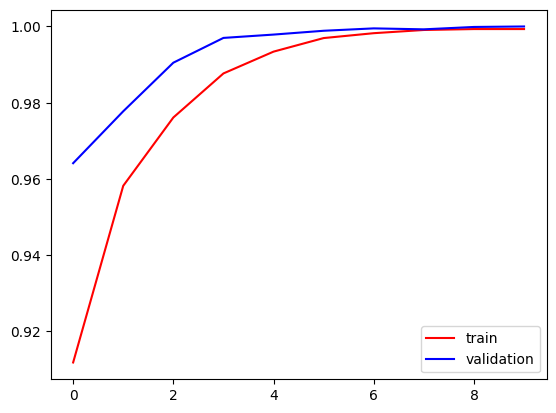

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

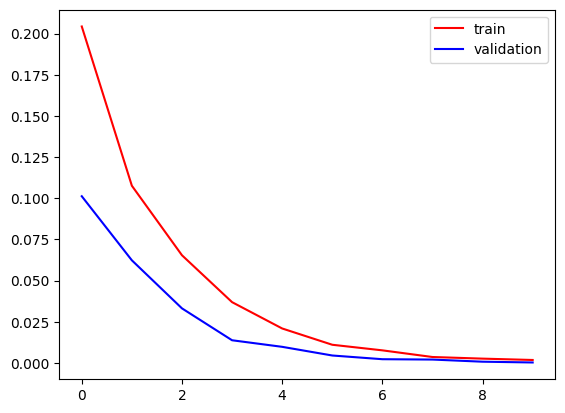

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(image_path):
  img = image.load_img(image_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0  # Normalize the image

  prediction = model.predict(img_array)
  if prediction[0][0] > 0.5:
    print("Prediction: Dog")
  else:
    print("Prediction: Cat")

In [39]:
image_path = '/content/cat.jpeg'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: Cat


In [40]:
import pickle

filename = 'trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))